__Цель лабораторной работы:__ изучение различных методов визуализация данных и создание истории на основе данных.

__Краткое описание.__ Построение графиков, помогающих понять структуру данных, и их интерпретация.

__Задание:__

-  Выбрать набор данных (датасет). 

- Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
    1. История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
    1. На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
    1. Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
    1. Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
    1. История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.
- Сформировать отчет и разместить его в своем репозитории на github.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(style="ticks")

import os
import glob
import random
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("forestfires.csv")

In [30]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


    X - x-axis spatial coordinate within the Montesinho park map
    Y - y-axis spatial coordinate within the Montesinho park map
    Month - month of the year: "jan" to "dec"
    Day - day of the week: "mon" to "sun"
    FFMC - FFMC index from the FWI system: 18.7 to 96.20
    DMC - DMC index from the FWI system: 1.1 to 291.3
    DC - DC index from the FWI system: 7.9 to 860.6
    ISI - ISI index from the FWI system: 0.0 to 56.10
    temp - temperature in Celsius degrees: 2.2 to 33.30
    RH - relative humidity in %: 15.0 to 100

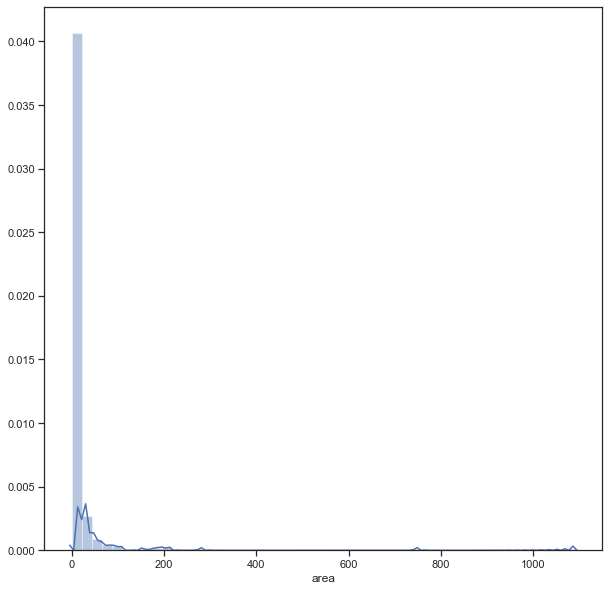

In [32]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['area'])

In [68]:
data['logarea'] = [math.log(data['area'][i]) if data['area'][i] > 0 else 0 for i in range(len(data['area']))]

In [69]:
data['binarea'] = [1 if data['area'][i] > 0 else 0 for i in range(len(data['area']))]

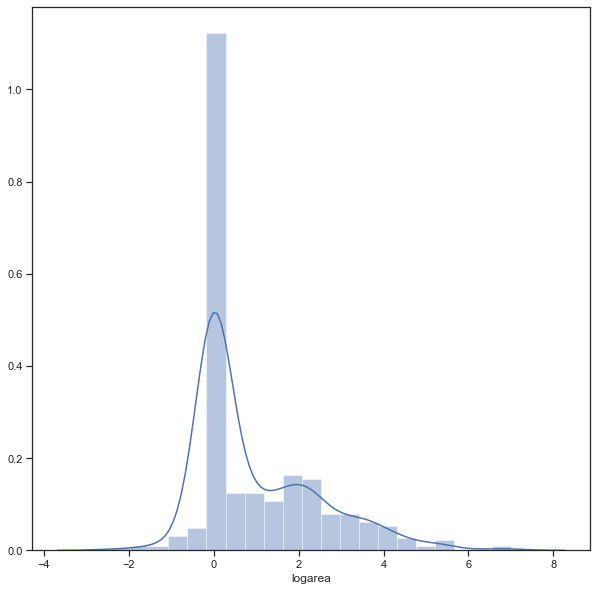

In [36]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['logarea'])

In [70]:
data = data.drop(['area'], axis = 1)

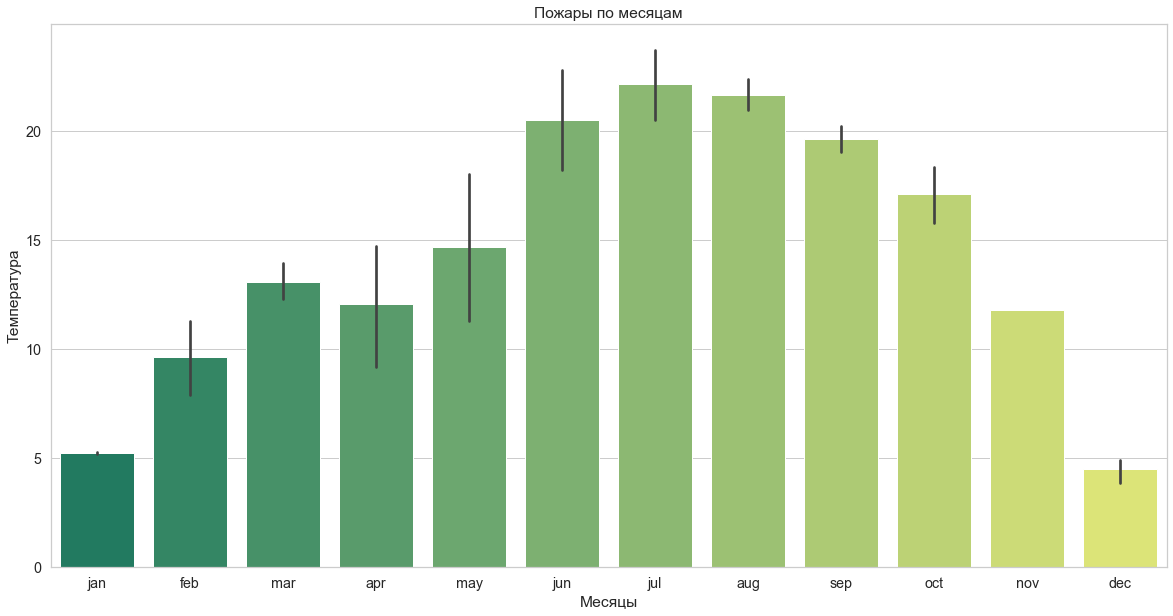

In [64]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "whitegrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'summer');
month_temp.set(title = "Пожары по месяцам", xlabel = "Месяцы", ylabel = "Температура");

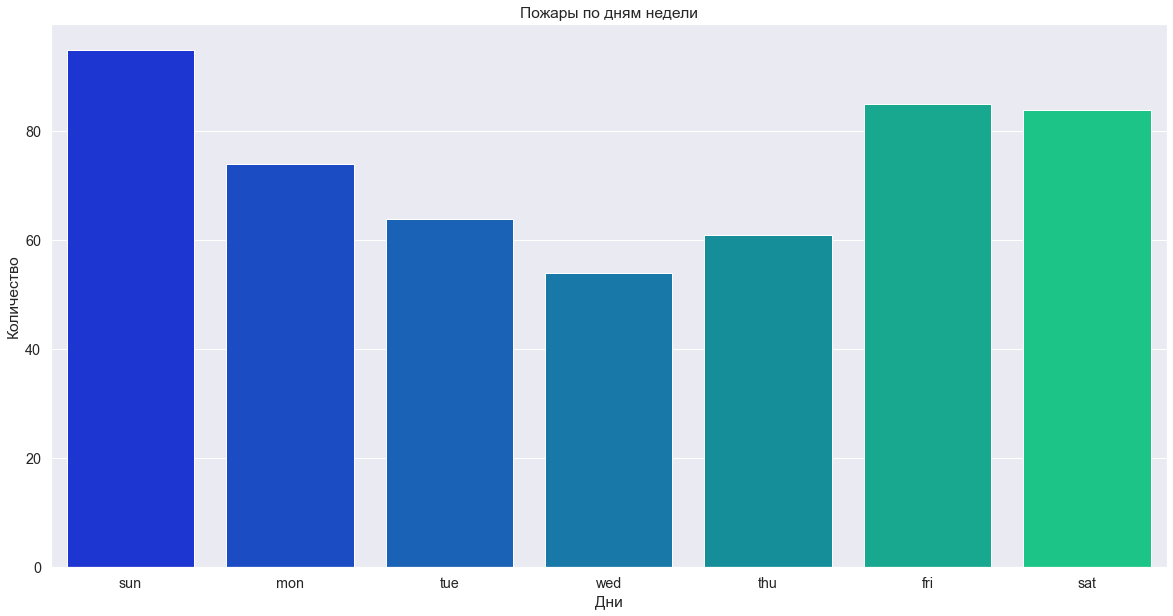

In [65]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = 'darkgrid', font_scale = 1.3)
day = sns.countplot(data['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], palette = 'winter')
day.set(title = 'Пожары по дням недели', xlabel = 'Дни', ylabel = 'Количество');

Прослеживается зависимость между температурой и выжженой территорией

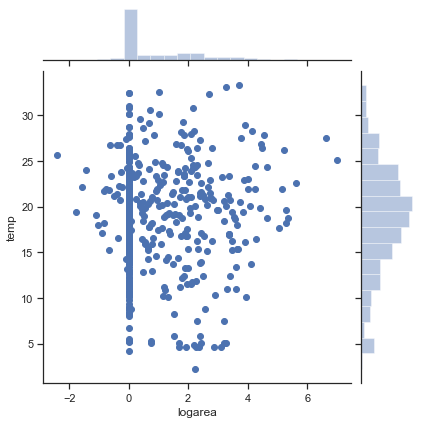

In [85]:
sns.jointplot(x = 'logarea', y = 'temp', data=data)

/Users/nonpenguin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/nonpenguin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/nonpenguin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


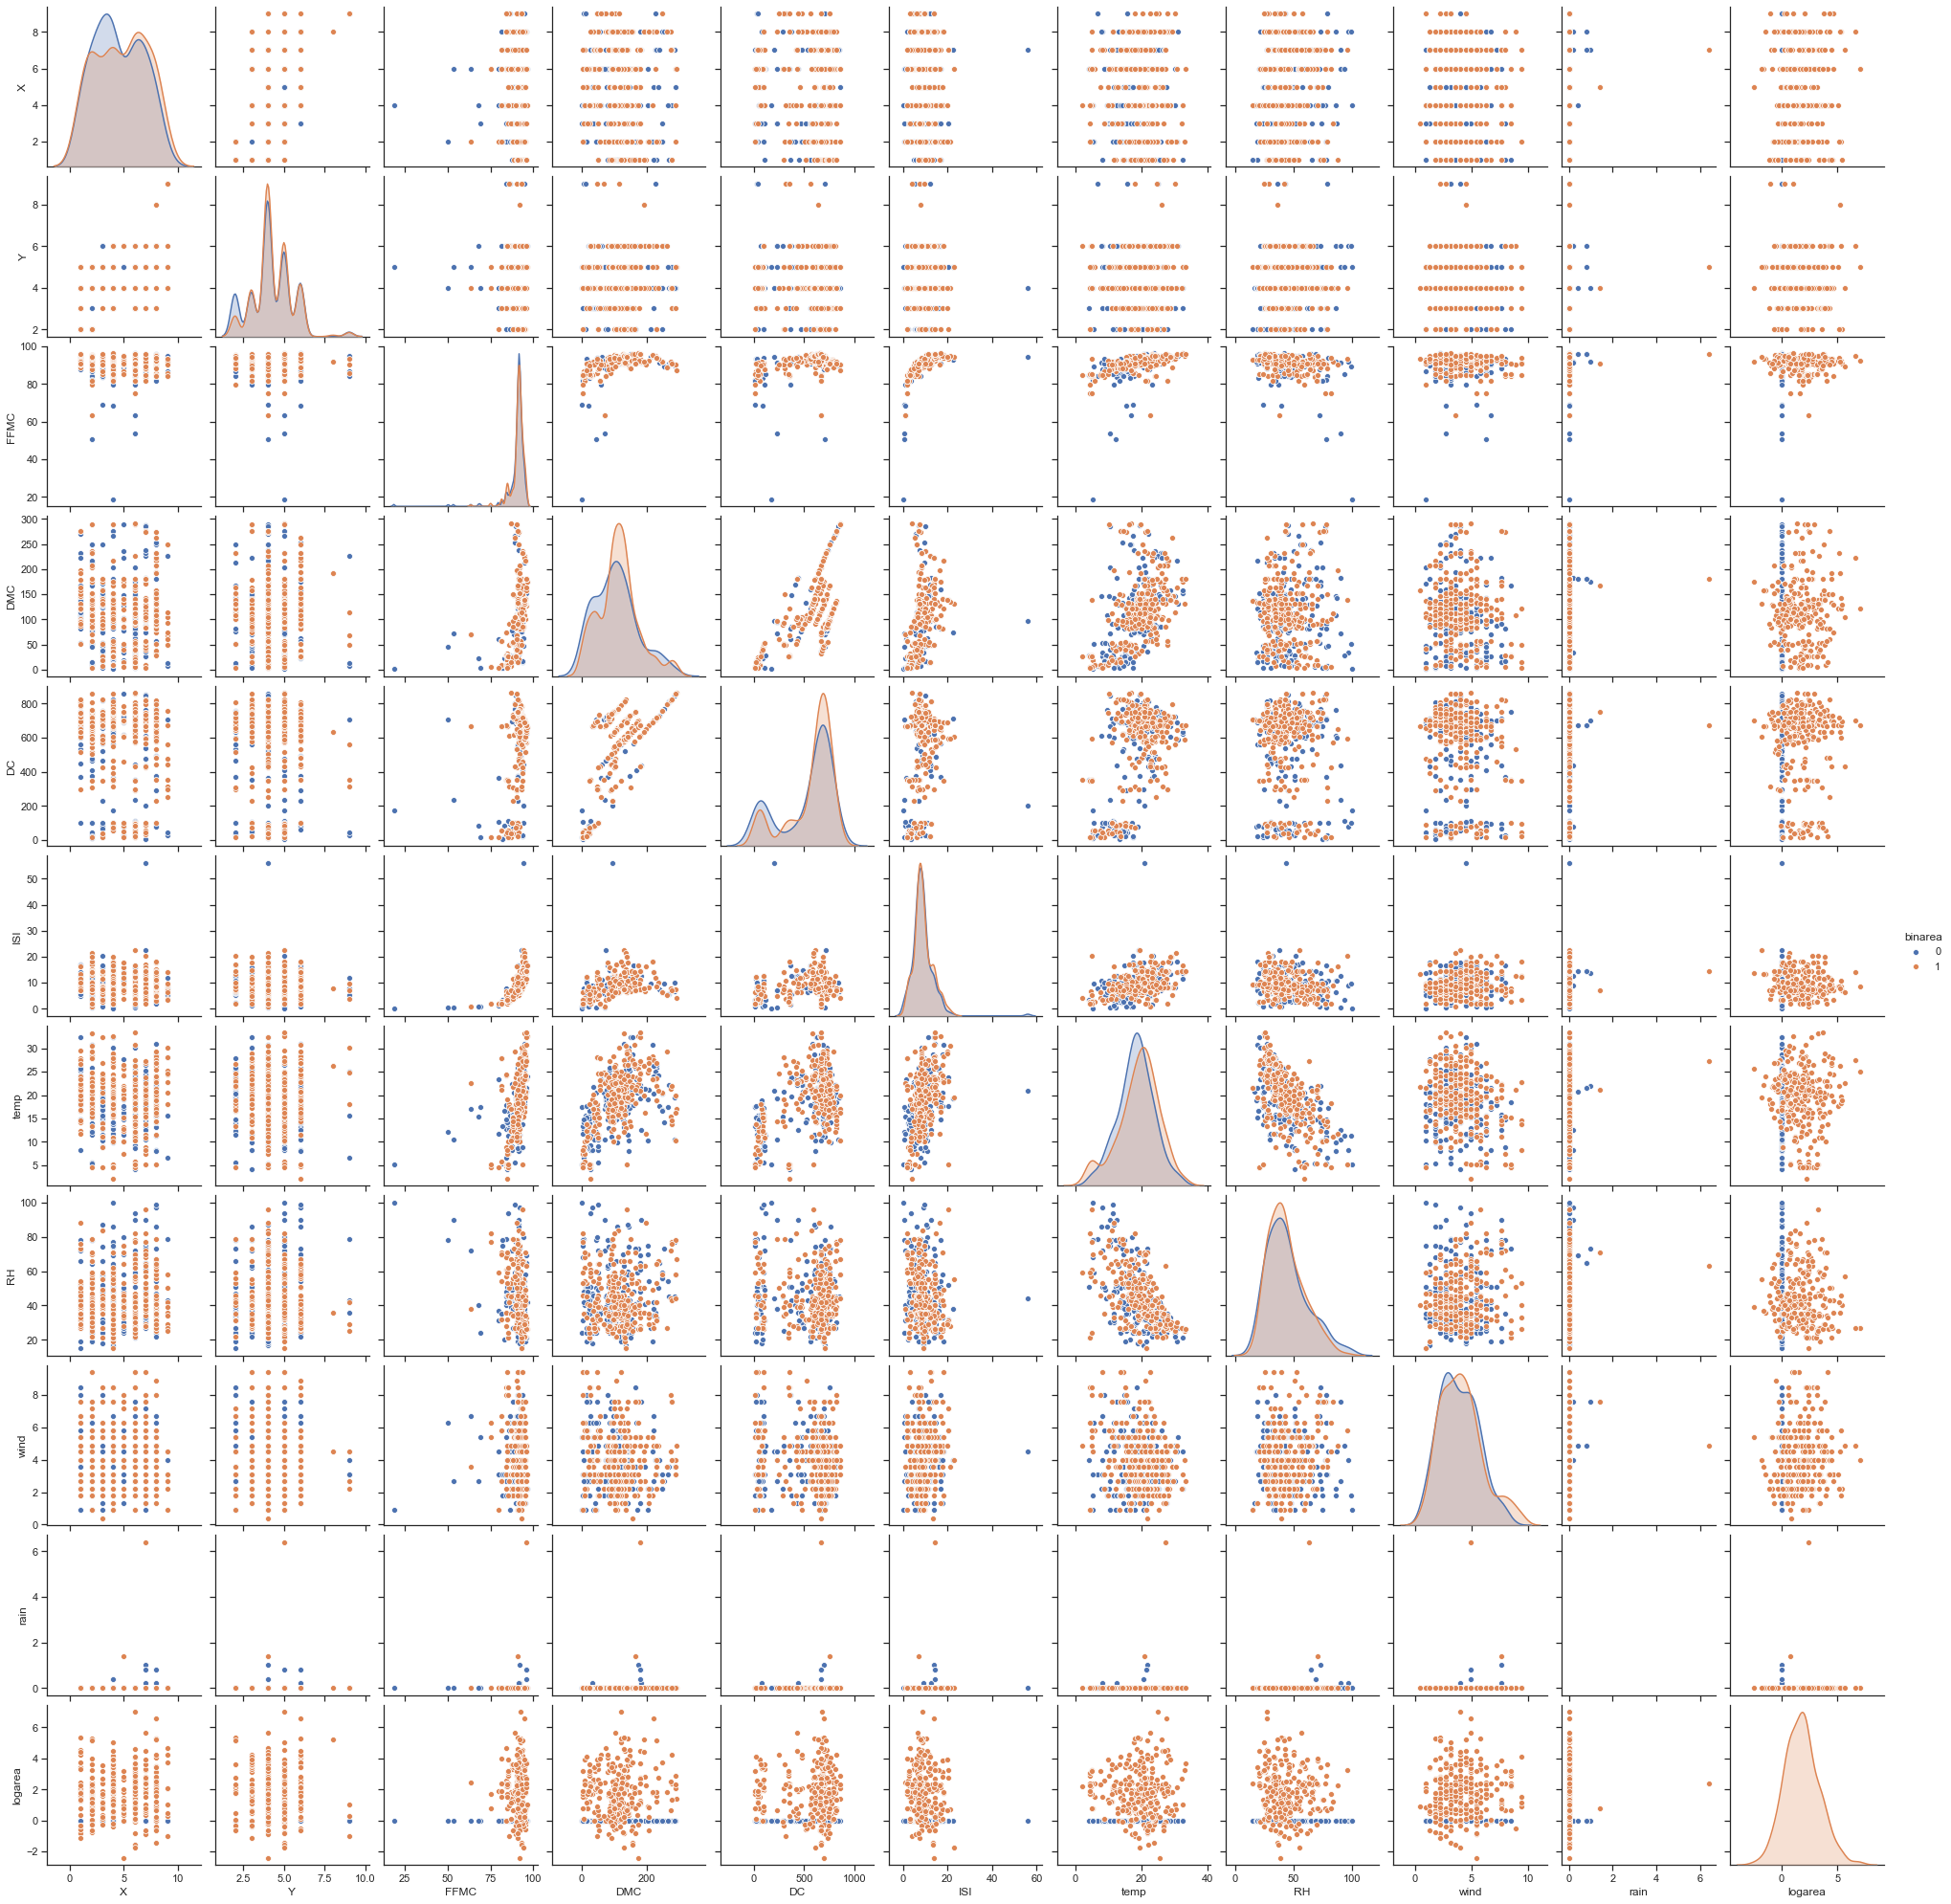

In [72]:
sns.pairplot(data, hue="binarea")

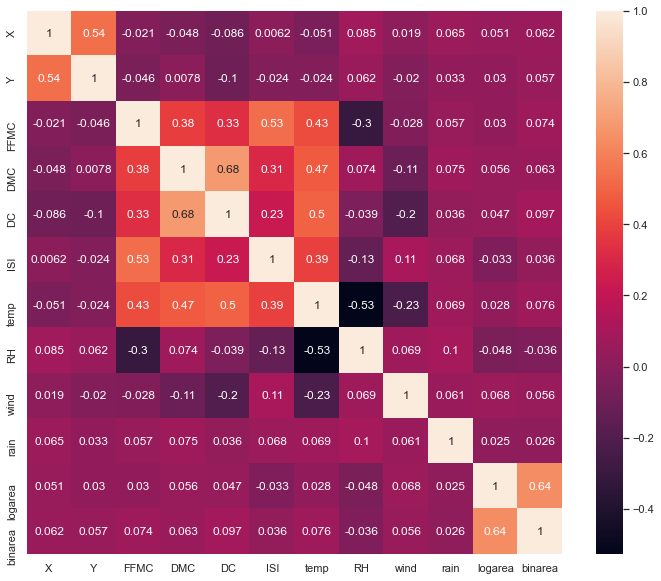

In [87]:
plt.rcParams['figure.figsize'] = [12, 10]
sns.set(font_scale = 1)
sns.heatmap(data.corr(), annot = True);

In [11]:
local_download_path = "modis/"

allTiles = []
for tile in list(glob.glob('modis/*/*.csv')):
    allTiles.append(tile)

In [92]:
count = 0

for file in list(glob.glob('modis/*/*.csv')):
    tempData = pd.read_csv(file)
    fileName = os.path.basename(file)[11:-4]
    if fileName in ignore:
        continue
    
    tempData['Country'] = fileName
    tempData['Year'] = tempData['acq_date'].str[:4]
    tempData['Month'] = tempData['acq_date'].str[5:7]
    tempData['Day'] = tempData['acq_date'].str[8:]
    
    if count == 0:
        fireData = tempData
        count = 1
    else:
        fireData = fireData.append(tempData, ignore_index=True)
    
#     if fileName not in dictFire.keys():
#         dictFire[fileName] = pd.read_csv(file)

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
fireData['daynight'] = le.fit_transform(fireData['daynight'])

In [93]:
fireData

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,Country,Year,Month,Day
0,12.5655,-87.1557,336.1,2.3,1.5,2010-01-01,344,Terra,MODIS,100,6.20,293.0,123.8,N,0,Nicaragua,2010,01,01
1,12.5661,-87.1397,315.9,2.3,1.5,2010-01-01,344,Terra,MODIS,92,6.20,292.4,44.9,N,0,Nicaragua,2010,01,01
2,12.5625,-87.1606,327.4,2.3,1.5,2010-01-01,344,Terra,MODIS,100,6.20,292.9,84.4,N,0,Nicaragua,2010,01,01
3,12.2485,-86.0166,321.7,1.9,1.3,2010-01-01,1559,Terra,MODIS,75,6.20,299.3,25.8,D,0,Nicaragua,2010,01,01
4,12.6725,-87.1997,323.2,2.3,1.5,2010-01-01,1559,Terra,MODIS,77,6.20,302.1,41.4,D,0,Nicaragua,2010,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9099480,-8.7540,158.1822,314.3,1.0,1.0,2021-10-31,310,Aqua,MODIS,61,6.03,296.1,7.4,D,0,Solomon_Islands,2021,10,31
9099481,-9.4771,160.1863,321.0,1.0,1.0,2021-11-09,304,Aqua,MODIS,72,6.03,303.4,8.9,D,0,Solomon_Islands,2021,11,09
9099482,-9.4470,160.1714,319.4,1.1,1.1,2021-11-11,252,Aqua,MODIS,71,6.03,297.6,11.5,D,0,Solomon_Islands,2021,11,11
9099483,-9.4505,160.1776,322.2,1.1,1.1,2021-11-11,252,Aqua,MODIS,75,6.03,298.4,12.9,D,0,Solomon_Islands,2021,11,11


In [19]:
fireData.to_csv('allfires.csv')

In [3]:
data = pd.read_csv("allfires.csv")

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

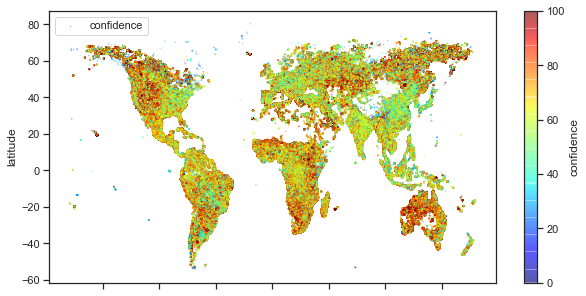

In [4]:
data.plot(kind="scatter", x="longitude", y="latitude",
    s=data['confidence']/100, label="confidence",
    c="confidence", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,5),
)
plt.legend()
plt.show()

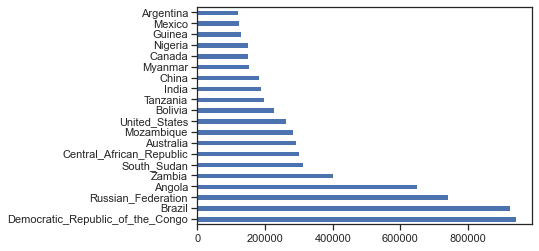

In [11]:
data['Country'].value_counts()[:20].plot(kind='barh')

В дальнейшем будем рассматривать ситуацию только в 20 странах с наибольшим количеством пожаров

In [4]:
to_del = data['Country'].value_counts()[20:]
ignore = to_del.index.tolist()

In [42]:
data = data[~data['Country'].isin(ignore)]
data

,Unnamed: 0,Unnamed: 0.1,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,...,confidence,version,bright_t31,frp,daynight,type,Country,Year,Month,Day
4655,4655,4655,27.6048,95.4073,300.5,1.0,1.0,2010-01-01,422,Terra,...,37,6.20,289.7,3.2,0,0,India,2010,1,1
4656,4656,4656,32.8904,76.1368,303.6,1.2,1.1,2010-01-01,559,Terra,...,40,6.20,291.6,7.4,0,0,India,2010,1,1
4657,4657,4657,32.8927,76.1240,302.7,1.2,1.1,2010-01-01,559,Terra,...,32,6.20,291.7,7.2,0,0,India,2010,1,1
4658,4658,4658,30.0065,80.3861,309.2,2.6,1.5,2010-01-01,600,Terra,...,68,6.20,281.7,48.4,0,0,India,2010,1,1
4659,4659,4659,21.9028,72.6840,314.5,1.2,1.1,2010-01-01,602,Terra,...,45,6.20,302.2,7.2,0,0,India,2010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785613,8785613,8785613,-11.8567,36.2871,327.4,2.0,1.4,2021-12-31,1054,Aqua,...,57,6.03,294.5,32.9,0,0,Mozambique,2021,12,31
8785614,8785614,8785614,-11.8545,36.3054,326.3,2.0,1.4,2021-12-31,1054,Aqua,...,32,6.03,299.2,27.1,0,0,Mozambique,2021,12,31
8785615,8785615,8785615,-12.7815,37.8605,330.9,1.6,1.2,2021-12-31,1054,Aqua,...,45,6.03,303.5,29.6,0,0,Mozambique,2021,12,31
8785616,8785616,8785616,-11.8517,36.2981,332.8,2.0,1.4,2021-12-31,1054,Aqua,...,76,6.03,299.8,54.1,0,0,Mozambique,2021,12,31


In [5]:
data = data.drop(data[data.Country.isin(ignore)].index)

In [21]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(data[['Country']]).toarray())
data = data.join(encoder_df)

In [25]:
data.to_csv('allfires_drop.csv')

In [89]:
data = pd.read_csv('allfires_drop.csv')

In [26]:
data.shape

(6726329, 42)

In [96]:
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [71]:
import matplotlib as mpl
mpl.style.use('ggplot')

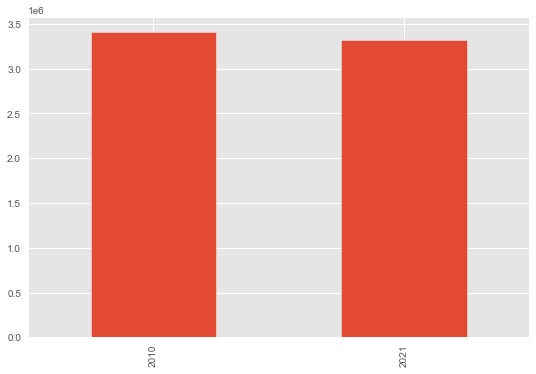

In [73]:
data['Year'].value_counts()[:20].plot(kind='bar')

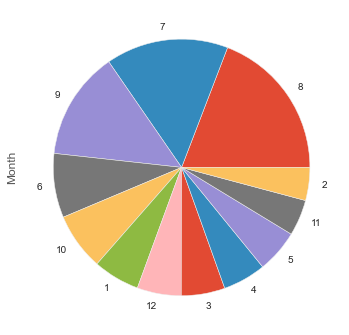

In [72]:
data['Month'].value_counts().plot(kind='pie')

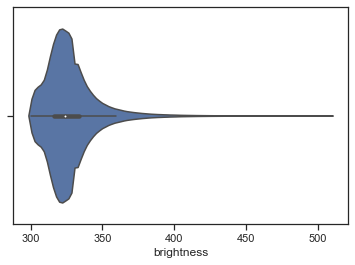

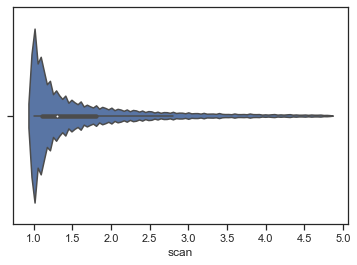

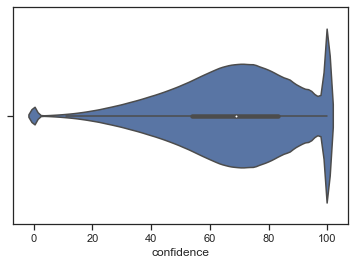

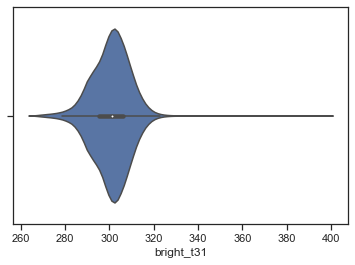

In [12]:
# Скрипичные диаграммы для числовых колонок
for col in ['brightness', 'scan', 'confidence', 'bright_t31']:
    sns.violinplot(x=data[col])
    plt.show()